In [1]:
%matplotlib inline

import os

from downloader import download_data, extract_data

url = 'http://ufldl.stanford.edu/housenumbers/'
data_folder = 'data/'

if not os.path.exists(data_folder):
    os.makedirs(data_folder)

train_filename = download_data('train.tar.gz', url, 404141560)
test_filename = download_data('test.tar.gz', url, 276555967)
extra_filename = download_data('extra.tar.gz', url, 1955489752)

cropped_train_filename = download_data('train_32x32.mat', url, 182040794)
cropped_test_filename = download_data('test_32x32.mat', url, 64275384)
cropped_extra_filename = download_data('extra_32x32.mat', url, 1329278602)

train_folder = extract_data('train.tar.gz')
test_folder = extract_data('test.tar.gz')
extra_folder = extract_data('extra.tar.gz')

Found and verified train.tar.gz
Found and verified test.tar.gz
Found and verified extra.tar.gz
Found and verified train_32x32.mat
Found and verified test_32x32.mat
Found and verified extra_32x32.mat
data/train already present - Skipping extraction of train.tar.gz.
data/test already present - Skipping extraction of test.tar.gz.
data/extra already present - Skipping extraction of extra.tar.gz.


Samples from training dataset


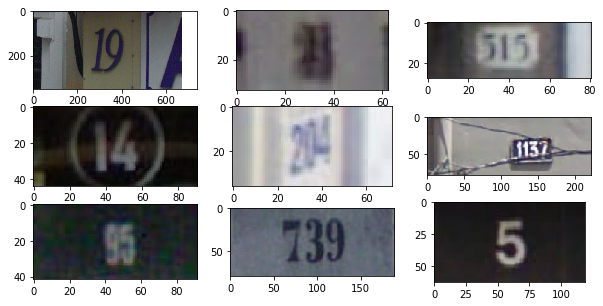

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

print("Samples from training dataset")

img1 = Image.open(train_folder + '/1.png', 'r')
img2 = Image.open(train_folder + '/11.png', 'r')
img3 = Image.open(train_folder + '/22.png', 'r')
img4 = Image.open(train_folder + '/33.png', 'r')
img5 = Image.open(train_folder + '/44.png', 'r')
img6 = Image.open(train_folder + '/55.png', 'r')
img7 = Image.open(train_folder + '/66.png', 'r')
img8 = Image.open(train_folder + '/77.png', 'r')
img9 = Image.open(train_folder + '/88.png', 'r')

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,5))
ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(img3)
ax4.imshow(img4)
ax5.imshow(img5)
ax6.imshow(img6)
ax7.imshow(img7)
ax8.imshow(img8)
ax9.imshow(img9)
plt.show()

Cropped data format

Samples from cropped training dataset


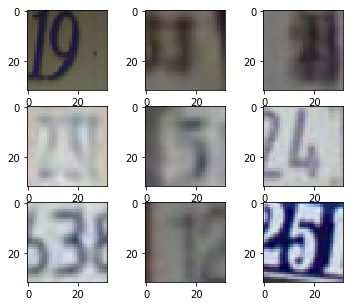

In [3]:
import scipy.io

print("Samples from cropped training dataset")

cropped_train_data = scipy.io.loadmat(cropped_train_filename)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(6,5))
ax1.imshow(cropped_train_data['X'][:,:,:,1])
ax2.imshow(cropped_train_data['X'][:,:,:,11])
ax3.imshow(cropped_train_data['X'][:,:,:,22])
ax4.imshow(cropped_train_data['X'][:,:,:,33])
ax5.imshow(cropped_train_data['X'][:,:,:,44])
ax6.imshow(cropped_train_data['X'][:,:,:,55])
ax7.imshow(cropped_train_data['X'][:,:,:,66])
ax8.imshow(cropped_train_data['X'][:,:,:,77])
ax9.imshow(cropped_train_data['X'][:,:,:,88])
plt.show()

In [4]:
cropped_train_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [5]:
cropped_train_data['X'].shape

(32, 32, 3, 73257)

In [6]:
cropped_train_data['y'].shape

(73257, 1)

In [7]:
cropped_train_data['y'][55]

array([4], dtype=uint8)

Some exploration in format boxes of digit

In [4]:
import numpy as np, h5py 
import pandas as pd

f = h5py.File(train_folder + '/digitStruct.mat','r')
train_data_boxes = f.get('digitStruct/bbox')
print(list(f[train_data_boxes[0][0]].keys()))
print(f[f[train_data_boxes[0][0]]['height'][0][0]][0][0])
print(f[f[train_data_boxes[0][0]]['width'][0][0]][0][0])

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


['height', 'label', 'left', 'top', 'width']
219.0
81.0


In [5]:
train_data_names = f.get('digitStruct/name')

In [10]:
train_data_names[0][0]

<HDF5 object reference>

In [11]:
temp = f[train_data_names[0][0]]
temp

<HDF5 dataset "b": shape (5, 1), type "<u2">

In [12]:
temp[:][:]

array([[ 49],
       [ 46],
       [112],
       [110],
       [103]], dtype=uint16)

In [13]:
f.get('digitStruct/bbox')

<HDF5 dataset "bbox": shape (33402, 1), type "|O">

In [14]:
f.get('digitStruct/name')

<HDF5 dataset "name": shape (33402, 1), type "|O">

In [15]:
for name in f:
    print(name)

#refs#
digitStruct


In [16]:
for name in f.get('digitStruct'):
    print(name)

bbox
name


In [17]:
list(f[train_data_boxes[0][0]].keys())

['height', 'label', 'left', 'top', 'width']

In [18]:
first_img = f[train_data_boxes[0][0]]

In [19]:
first_img.values()

ValuesViewHDF5(<HDF5 group "/#refs#/VQi" (5 members)>)

In [20]:
list(first_img.values())

[<HDF5 dataset "height": shape (2, 1), type "|O">,
 <HDF5 dataset "label": shape (2, 1), type "|O">,
 <HDF5 dataset "left": shape (2, 1), type "|O">,
 <HDF5 dataset "top": shape (2, 1), type "|O">,
 <HDF5 dataset "width": shape (2, 1), type "|O">]

In [21]:
f[train_data_boxes[0][0]]['label'].shape

(2, 1)

In [22]:
train_data_boxes.shape

(33402, 1)

In [23]:
params = list(f[train_data_boxes[0][0]].keys())

In [30]:
train_data_boxes.shape[0]

33402

In [32]:
%%time
images = {}
for i in range(10):#range(train_data_boxes.shape[0]):
    try:
        digits = []
        for digit in range(f[train_data_boxes[i][0]]['label'].shape[0]):
            # [label, rect:x_left_top, y_left_top, x_right_bottom, y_right_bottom]
            digit_info = []
            digit_info.append(f[f[train_data_boxes[i][0]]['label'][digit][0]][0][0])
            rect = []
            rect.append(f[f[train_data_boxes[i][0]]['left'][digit][0]][0][0])
            rect.append(f[f[train_data_boxes[i][0]]['top'][digit][0]][0][0])
            rect.append(f[f[train_data_boxes[i][0]]['width'][digit][0]][0][0])
            rect.append(f[f[train_data_boxes[i][0]]['height'][digit][0]][0][0])
            rect[2] += rect[0]
            rect[3] += rect[1]
            digit_info.extend(np.array(rect))
            digits.append(np.array(digit_info))
        images[i+1] = np.array(digits)
    except:
        pass

CPU times: user 89.6 ms, sys: 3.7 ms, total: 93.3 ms
Wall time: 91.8 ms


In [33]:
images

{1: array([[   1.,  246.,   77.,  327.,  296.],
        [   9.,  323.,   81.,  419.,  300.]]),
 2: array([[   2.,   77.,   29.,  100.,   61.],
        [   3.,   98.,   25.,  124.,   57.]]),
 3: array([[  2.,  17.,   5.,  25.,  20.],
        [  5.,  25.,   5.,  34.,  20.]]),
 4: array([[  9.,  57.,  13.,  72.,  47.],
        [  3.,  72.,  13.,  85.,  47.]]),
 5: array([[  3.,  52.,   7.,  73.,  53.],
        [  1.,  74.,  10.,  89.,  56.]]),
 6: array([[  3.,  28.,   6.,  38.,  27.],
        [  3.,  38.,   8.,  49.,  29.]]),
 7: array([[  2.,  35.,  10.,  48.,  42.],
        [  8.,  47.,  11.,  60.,  43.]]),
 8: array([[  7.,  17.,   4.,  24.,  19.],
        [  4.,  25.,   4.,  31.,  19.],
        [  4.,  31.,   3.,  38.,  18.]]),
 9: array([[  1.,  19.,   4.,  33.,  28.],
        [  2.,  29.,   4.,  42.,  28.],
        [  8.,  38.,   5.,  55.,  29.]]),
 10: array([[  1.,  25.,   6.,  34.,  33.],
        [  6.,  34.,   4.,  48.,  31.]])}

In [34]:
%%time
images = {}
for i in range(train_data_boxes.shape[0]):
    try:
        digits = []
        for digit in range(f[train_data_boxes[i][0]]['label'].shape[0]):
            # [label, rect:x_left_top, y_left_top, x_right_bottom, y_right_bottom]
            digit_info = []
            digit_info.append(f[f[train_data_boxes[i][0]]['label'][digit][0]][0][0])
            rect = []
            rect.append(f[f[train_data_boxes[i][0]]['left'][digit][0]][0][0])
            rect.append(f[f[train_data_boxes[i][0]]['top'][digit][0]][0][0])
            rect.append(f[f[train_data_boxes[i][0]]['width'][digit][0]][0][0])
            rect.append(f[f[train_data_boxes[i][0]]['height'][digit][0]][0][0])
            rect[2] += rect[0]
            rect[3] += rect[1]
            digit_info.extend(np.array(rect))
            digits.append(np.array(digit_info))
        images[i+1] = np.array(digits)
    except:
        pass

CPU times: user 3min 59s, sys: 4.14 s, total: 4min 3s
Wall time: 4min 7s


In [35]:
len(images.keys())

28265

In [22]:
f[f[train_data_boxes[0][0]]['top'][0][0]][0]

array([ 77.])

In [67]:
f[f[train_data_boxes[0][0]]['label'][1][0]][0]

array([ 9.])

In [62]:
f[f[train_data_boxes[0][0]]['label'][0][0]][0]

array([ 1.])

In [5]:
box_heights = []
box_widths = []
for b in train_data_boxes:
    b = f[b[0]]
    for height in b['height']:
        height = height[0]
        if not isinstance(height, float):
            height = f[height][0][0]
        box_heights.append(height)
    for width in b['width']:
        width = width[0]
        if not isinstance(width, float):
            width = f[width][0][0]
        box_widths.append(width)
box_dims = pd.DataFrame({ 'width': box_widths, 'height': box_heights })
box_dims.head()

,height,width
0,219.0,81.0
1,219.0,96.0
2,32.0,23.0
3,32.0,26.0
4,15.0,8.0


In [6]:
box_dims.describe()

,height,width
count,73257.000000,73257.000000
mean,33.861310,16.650491
std,18.601294,10.681429
min,9.000000,1.000000
25%,21.000000,10.000000
50%,29.000000,14.000000
75%,41.000000,21.000000
max,403.000000,207.000000


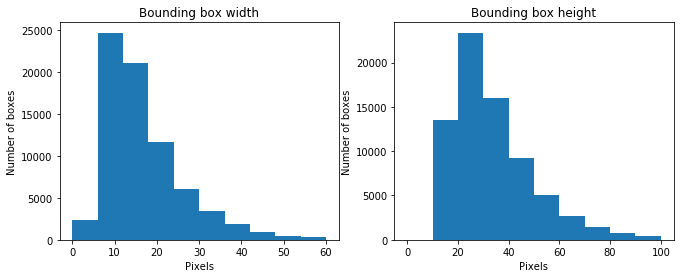

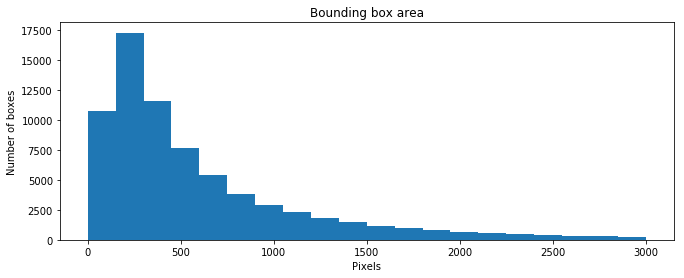

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.hist(box_dims['width'], range=[0, 60])
ax1.set_title('Bounding box width')
ax1.set_xlabel('Pixels')
ax1.set_ylabel('Number of boxes')
ax2.hist(box_dims['height'], range=[0, 100])
ax2.set_title('Bounding box height')
ax2.set_xlabel('Pixels')
ax2.set_ylabel('Number of boxes')
plt.show()

fig, (ax1) = plt.subplots(1, 1, figsize=(11,4))
ax1.hist(box_dims['width'] * box_dims['height'], range=[0, 3000], bins=20)
ax1.set_title('Bounding box area')
ax1.set_xlabel('Pixels')
ax1.set_ylabel('Number of boxes')
plt.show()

## Resize images

In [72]:
formated_train_folder = train_folder + '/formated_data_192x64'

In [25]:
img1 = Image.open(train_folder + '/74.png', 'r')

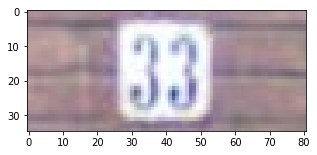

In [26]:
fig, ((ax1)) = plt.subplots(1, 1, figsize=(5,3))
ax1.imshow(img1)
plt.show()

1: array([[   1.,  246.,   77.,  327.,  296.],
        [   9.,  323.,   81.,  419.,  300.]]),

In [27]:
img1.getbbox()

(0, 0, 81, 35)

In [28]:
img = img1.resize((64*3,64))

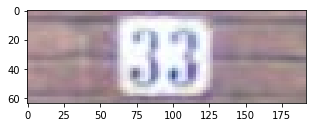

In [29]:
fig, ((ax1)) = plt.subplots(1, 1, figsize=(5,3))
ax1.imshow(img)
plt.show()

In [32]:
images[74]

array([[  3.,  66.,   7.,  90.,  55.],
       [  3.,  95.,  11., 123.,  59.]])

In [71]:
img.save(formated_train_folder + '/1.png')

In [6]:
def images_dict(f, data_boxes):
    """
    Return
    ------
    images: dict
        format = {
            img_index: [
                [label_digit_1, x_left_top, y_left_top, x_right_bottom, y_right_bottom],
                [label_digit_2, x_left_top, y_left_top, x_right_bottom, y_right_bottom],
                ...
            ], 
            ...
        }
    """
    images = {}
    for i in range(data_boxes.shape[0]):
        digits = []
        for digit in range(f[data_boxes[i][0]]['label'].shape[0]):
            # [label, rect:x_left_top, y_left_top, x_right_bottom, y_right_bottom]
            digit_info = []
            rect = []
            try:
                digit_info.append(f[f[data_boxes[i][0]]['label'][digit][0]][0][0])
                rect.append(f[f[data_boxes[i][0]]['left'][digit][0]][0][0])
                rect.append(f[f[data_boxes[i][0]]['top'][digit][0]][0][0])
                rect.append(f[f[data_boxes[i][0]]['width'][digit][0]][0][0])
                rect.append(f[f[data_boxes[i][0]]['height'][digit][0]][0][0])
            except:
                digit_info.append(f[data_boxes[i][0]]['label'][digit][0])
                rect.append(f[data_boxes[i][0]]['left'][digit][0])
                rect.append(f[data_boxes[i][0]]['top'][digit][0])
                rect.append(f[data_boxes[i][0]]['width'][digit][0])
                rect.append(f[data_boxes[i][0]]['height'][digit][0])
            rect[2] += rect[0]
            rect[3] += rect[1]
            digit_info.extend(np.array(rect))
            digits.append(np.array(digit_info))
        images[i+1] = np.array(digits)
    return images

In [64]:
FINAL_HEIGHT = 64
FINAL_WIDTH = 192

def reformat_rect(width, height, rect):
    rect[0] = float(round(rect[0] * FINAL_WIDTH/width))
    rect[1] = float(round(rect[1] * FINAL_HEIGHT/height))
    rect[2] = float(round(rect[2] * FINAL_WIDTH/width))
    rect[3] = float(round(rect[3] * FINAL_HEIGHT/height))
    return rect

def create_resized_image(input_folder, output_folder, img_index):
    img = Image.open(input_folder + '/' + str(img_index) + '.png', 'r')
    width, height = img.getbbox()[2:]
    img = img.resize((FINAL_WIDTH, FINAL_HEIGHT))
    img.save(output_folder + '/' + str(img_index) + '.png')
    return width, height

def resize_images(input_folder, output_folder, images_dict):
    for img_index, digits in images_dict.items():
        width, height = create_resized_image(input_folder, output_folder, img_index)
        for digit in digits:
            digit[1:] = reformat_rect(width, height, digit[1:])

In [8]:
formated_train_folder = train_folder + '/formated_data_192x64'

In [9]:
%%time
images = images_dict(f, train_data_boxes)

CPU times: user 3min 43s, sys: 5.58 s, total: 3min 49s
Wall time: 3min 43s


In [10]:
print(len(images.keys()))

33402


In [11]:
%%time
resize_images(train_folder, formated_train_folder, images)

CPU times: user 3min 49s, sys: 17.2 s, total: 4min 6s
Wall time: 4min 18s


## Create json for TensorBox

json-format

<code>
[
  {
    "image_path": "images/1/abc.jpg",
    "rects":
      [
        {"x1": 0, "y1": 0, "x2": 100, "y2": 100},
        {"x1": 200, "y1": 150, "x2": 220, "y2": 300}
      ]
  },
  {
    "image_path": "images/2/klm.jpg",
    "rects":
      [
        {"x1": 200, "y1": 0, "x2": 300, "y2": 100}
      ]
  },
]
</code>

In [12]:
import json

In [13]:
def get_rects_list(digits):
    rects = []
    for digit in digits:
        rect = {
            "x1": digit[1],
            "y1": digit[2],
            "x2": digit[3],
            "y2": digit[4],
        }
        rects.append(rect)
    return rects
    
def images_to_json(filename, data_path, images_dict):
    json_output = []
    for img_index, digits in images_dict.items():
        img = {
            "image_path": data_path + str(img_index) + '.png',
            "rects": get_rects_list(digits),
            "labels": [digit[0] for digit in digits]
        }
        json_output.append(img)
    json.dump(json_output, open(filename, 'w'), indent=4)

In [14]:
filename = train_folder + '/' + 'train.json'
data_path = formated_train_folder + '/'
images_to_json(filename, data_path, images)

## Test dataset

In [15]:
formated_test_folder = test_folder + '/formated_data_192x64'
f = h5py.File(test_folder + '/digitStruct.mat','r')
test_data_boxes = f.get('digitStruct/bbox')

In [16]:
%%time
test_images = images_dict(f, test_data_boxes)

CPU times: user 1min 21s, sys: 2.31 s, total: 1min 23s
Wall time: 1min 26s


In [17]:
print(len(test_images.keys()))

13068


In [18]:
%%time
resize_images(test_folder, formated_test_folder, test_images)

CPU times: user 1min 37s, sys: 11.5 s, total: 1min 49s
Wall time: 1min 57s


Create json for TensorBox

In [22]:
filename = test_folder + '/' + 'test.json'
data_path = formated_test_folder + '/'
images_to_json(filename, data_path, test_images)

In [23]:
print(filename)

data/test/test.json


In [24]:
print(train_folder + '/' + 'train.json')

data/train/train.json


## Get images without resize

#### Test

In [65]:
f = h5py.File(test_folder + '/digitStruct.mat','r')
test_data_boxes = f.get('digitStruct/bbox')

In [66]:
%%time
test_images = images_dict(f, test_data_boxes)

CPU times: user 1min 59s, sys: 2.28 s, total: 2min 1s
Wall time: 3min 37s


In [67]:
print(len(test_images.keys()))

13068


Create json for TensorBox

In [68]:
filename = test_folder + '/' + 'test_without_resize.json'
data_path = test_folder + '/'
images_to_json(filename, data_path, test_images)

#### Train

In [69]:
f = h5py.File(train_folder + '/digitStruct.mat','r')
train_data_boxes = f.get('digitStruct/bbox')

In [70]:
%%time
train_images = images_dict(f, train_data_boxes)

CPU times: user 5min 44s, sys: 7.11 s, total: 5min 51s
Wall time: 11min 6s


In [71]:
print(len(train_images.keys()))

33402


Create json for TensorBox

In [72]:
filename = train_folder + '/' + 'train_without_resize.json'
data_path = train_folder + '/'
images_to_json(filename, data_path, train_images)

# Visualization of the results of a detection.

In [ ]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from models.research.object_detection.utils import visualization_utils as vis_util
from models.research.object_detection.utils import label_map_util


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

def get_number(boxes, scores, classes, category_index, prob_threshold=0.5):
    # box = [y1, x1, y2, x2]
    # count digits
    n_digits = 0
    for score in scores:
        if score < prob_threshold:
            break
        n_digits += 1
    # sort digits
    digits = [(box, score, _class) 
              for box, score, _class in zip(boxes[:n_digits], scores[:n_digits], classes[:n_digits])]
    sorted(digits, key=lambda digit: digit[0][1])
    # get number
    number_str = ''
    for digit in digits:
        number_str += category_index[digit[2]]['name']
    return number_str


PATH_TO_LABELS = 'label_map.pbtxt'
NUM_CLASSES = 10
PATH_TO_TEST_IMAGES_DIR = 'data/test'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, '{}.png'.format(i)) for i in range(1, 2) ]
OUTPUT_FOLDER = './'

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = 'exported_model_directory' + '/frozen_inference_graph.pb'

# Load model
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
# Calculate
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
            img_index = int(image_path.split('/')[-1].replace('.png', ''))
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=1)
            number_str = get_number(
                np.squeeze(boxes), np.squeeze(scores), np.squeeze(classes).astype(np.int32), category_index)
            img = Image.fromarray(image_np)
            img.save(os.path.join(OUTPUT_FOLDER, str(img_index) + '_(' + number_str + ')' + '.png'))
            print("Number: {}".format(number_str))

In [42]:
from models.research.object_detection.utils import visualization_utils as vis_util

/Users/maxim/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [43]:
from models.research.object_detection.utils import label_map_util

In [47]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [44]:
PATH_TO_LABELS = 'label_map.pbtxt'
NUM_CLASSES = 10

In [45]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [49]:
PATH_TO_TEST_IMAGES_DIR = test_folder
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, '{}.png'.format(i)) for i in range(1, 3) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [50]:
TEST_IMAGE_PATHS

['data/test/1.png', 'data/test/2.png']

#### Load model

In [98]:
import tensorflow as tf

In [106]:
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = 'exported_model_directory' + '/frozen_inference_graph.pb'

In [107]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

#### Show result

In [111]:
def get_number(boxes, scores, classes, category_index, prob_threshold=0.5):
    # box = [y1, x1, y2, x2]
    # count digits
    n_digits = 0
    for score in scores:
        if score < prob_threshold:
            break
        n_digits += 1
    
    # sort digits
    digits = [(box, score, _class) 
              for box, score, _class in zip(boxes[:n_digits], scores[:n_digits], classes[:n_digits])]
    sorted(digits, key=lambda digit: digit[0][1])
    
    # get number
    number_str = ''
    for digit in digits:
        number_str += category_index[digit[2]]['name']
    return number_str

[[[0.1506667  0.3942747  0.87504053 0.61341   ]
  [0.09483657 0.372038   0.8954379  0.62410957]
  [0.11861454 0.3750459  0.86674243 0.60078454]
  [0.07486241 0.35082972 0.9421834  0.6567358 ]
  [0.11864371 0.36715698 0.9285964  0.6027905 ]
  [0.16965948 0.363473   0.9511136  0.6168394 ]
  [0.24147539 0.35870266 0.90102935 0.6297926 ]]] [[0.988868   0.04298715 0.01033168 0.01012597 0.00523848 0.00497182
  0.0028113 ]] [[5. 3. 4. 5. 6. 9. 7.]] [7.]
Number: 5
[[[0.07950911 0.5312636  0.7004383  0.63046765]
  [0.21406567 0.6768978  0.5598326  0.74142784]
  [0.21889138 0.6704171  0.67512536 0.74595404]
  [0.15574852 0.5273328  0.6701914  0.6338315 ]
  [0.1269031  0.5471394  0.6090259  0.61202323]
  [0.11203921 0.52955014 0.6969945  0.625812  ]
  [0.19545397 0.6685493  0.61223865 0.76875985]]] [[0.6672927  0.54698366 0.39398423 0.09044708 0.04913853 0.03953551
  0.01701823]] [[ 2. 10.  9.  4.  2.  1. 10.]] [7.]
Number: 20


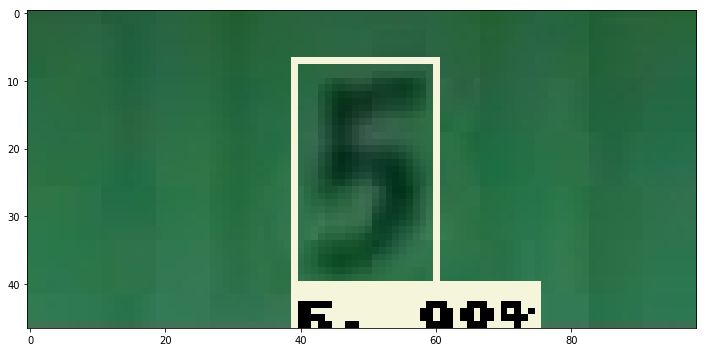

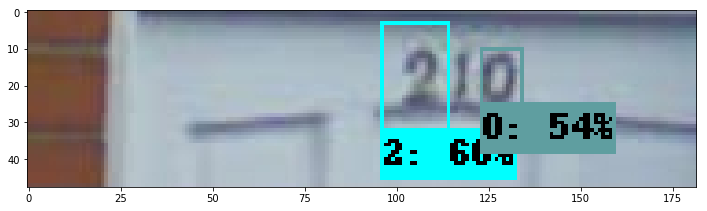

In [113]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=1)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            print(boxes, scores, classes, num)
            print("Number: {}".format(get_number(
                np.squeeze(boxes), np.squeeze(scores), np.squeeze(classes).astype(np.int32), category_index)))

In [116]:
img = Image.fromarray(image_np)
# img.save(output_folder + '/' + str(img_index) + '.png')

[[[0.1367312  0.4081587  0.9097406  0.60007674]
  [0.11720508 0.40142247 0.86223775 0.61428833]
  [0.11191873 0.43005514 0.9541665  0.7012576 ]
  [0.01520576 0.39813912 0.9555713  0.61669147]
  [0.         0.3433409  0.97148633 0.670514  ]
  [0.09808418 0.36625442 0.91364974 0.55977297]
  [0.10247674 0.38022223 0.8916025  0.5843336 ]
  [0.08119725 0.37271237 0.8963065  0.58555543]
  [0.13104913 0.3720829  0.91595876 0.5537938 ]
  [0.02993175 0.36627415 0.9916556  0.7005718 ]
  [0.04246376 0.3765887  0.893148   0.5956845 ]
  [0.15587352 0.36020836 0.9622399  0.5566944 ]
  [0.1819939  0.40652585 0.91300905 0.66747165]
  [0.08647297 0.3972864  0.9599815  0.60351425]
  [0.08885861 0.34897727 0.8881529  0.700942  ]
  [0.1136138  0.3410726  0.99999994 0.7380624 ]
  [0.15201929 0.44566008 0.78290904 0.5838665 ]
  [0.05882169 0.2655428  0.94418657 0.75129205]
  [0.06446951 0.4347636  0.9472811  0.86058444]
  [0.0492321  0.3566236  0.99999994 0.6720775 ]
  [0.01319788 0.353369   0.99999994 0.69

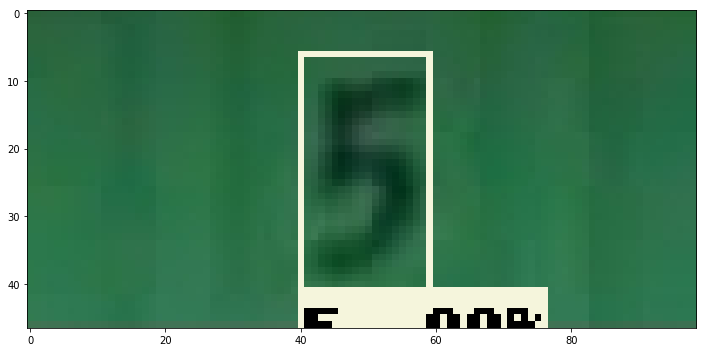

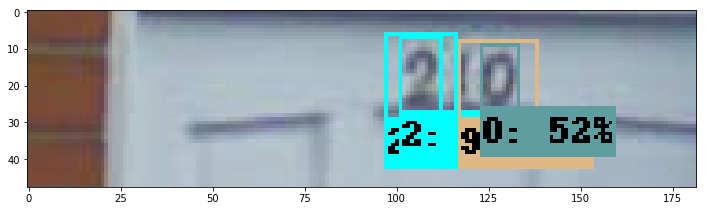

In [105]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=1)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            print(boxes, scores, classes, num)

#### Show right images

In [87]:
def get_boxes(img_info):
    return np.array([[line[2], line[1], line[4], line[3]] for line in img_info])

In [88]:
def get_classes(img_info):
    return np.array([int(line[0]) if line[0] != 0 else 10
                     for line in img_info])

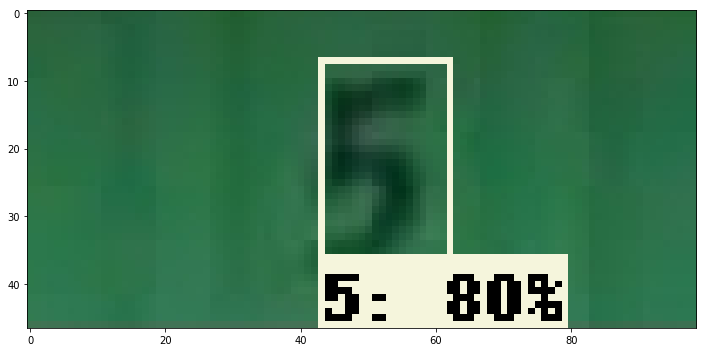

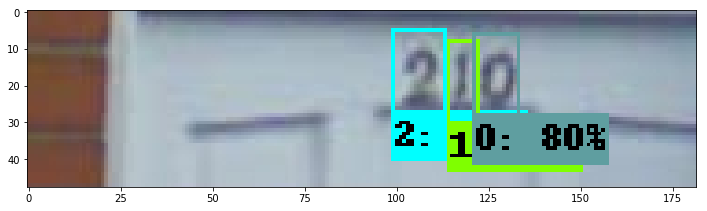

In [95]:
for image_path in TEST_IMAGE_PATHS:
    index = int(image_path.split('/')[-1].replace('.png', ''))
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    boxes = get_boxes(test_images[index])
    classes = get_classes(test_images[index])
    num = len(classes)
    scores = np.ones(num)*0.8
#     (boxes, scores, classes, num) = sess.run(
#         [detection_boxes, detection_scores, detection_classes, num_detections],
#         feed_dict={image_tensor: image_np_expanded})
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        boxes,
        classes.astype(np.int32),
        scores,
        category_index,
        use_normalized_coordinates=False,
        line_thickness=1)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)